RANDOM FOREST

The Random Forest model is used to determine if a bill is genuine or fake because it handles many factors at once. Multiple 'trees' are created to make predictions, which are then combined for accuracy. This model works well with different types of data and highlights important features, like size or height, that help decide if a bill is real or fake.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [4]:
# Load the dataset
file_path = 'fake_bills.csv'  
data = pd.read_csv(file_path)


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before imputation:\n", missing_values)


Missing values before imputation:
 is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


                 We used fillna() for Random Forest to replace missing values in the dataset, specifically in the margin_low column, without losing any data. Since Random Forest models require complete data, using fillna() ensures that missing values are filled with the mean of the column, allowing the model to use all the data for training. If we used dropna(), we would lose rows with missing values, which could reduce the amount of data and negatively affect the model’s performance.

In [6]:
# Impute missing values in 'margin_low' with the mean of the column
data['margin_low'].fillna(data['margin_low'].mean(), inplace=True)


/tmp/ipykernel_48074/2258267462.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['margin_low'].fillna(data['margin_low'].mean(), inplace=True)


In [7]:
# Check for missing values again after imputation
missing_values_after_imputation = data.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after_imputation)



Missing values after imputation:
 is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [8]:
# Define feature columns (X) and target variable (y)
X = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = data['is_genuine']


In [9]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)


In [11]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9933333333333333
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



1. Accuracy: 
                 The Random Forest model achieved an accuracy of 99.33%, meaning it correctly classified about 99.33% of instances. This is slightly lower than the 99.54% accuracy of the KNN model, but still shows excellent performance, with Random Forest being a very effective choice for this task.
2. Classification Report: 

                Precision:
                False (Fake bills): 1.00
                Out of all bills predicted as fake, 100% were actually fake.

                True (Genuine bills): 0.99
                Out of all bills predicted as genuine, 99% were actually genuine.

                Recall:
                False (Fake bills): 0.98
                Out of all actual fake bills, the model correctly identified 98% of them.

                True (Genuine bills): 1.00
                Out of all actual genuine bills, the model correctly identified 100% of them.

               F1-Score:
               A balance between precision and recall.

              Fake bills: 0.99

              Genuine bills: 0.99

              Support:
              110 fake bills and 190 genuine bills in the test set.

             Macro Avg (Average of both classes):
            Precision, recall, and F1-score averaged equally across both classes — all 0.99.

            Weighted Avg (Takes into account the number of samples per class):
            Also shows 0.99 for all scores, which means performance is balanced even with more genuine bills than fake ones.










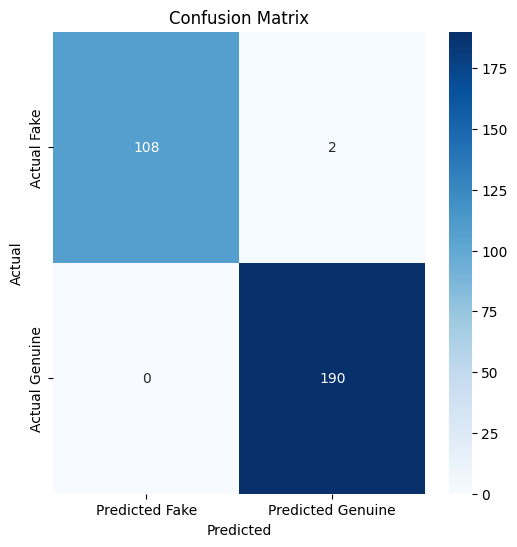

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Fake', 'Predicted Genuine'], yticklabels=['Actual Fake', 'Actual Genuine'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 Confusion Matrix

              True Negatives (TN): 110 instances where the model correctly predicted fake bills as fake.

              False Positives (FP): 0 instances where the model incorrectly predicted fake bills as genuine.

              False Negatives (FN): 0 instances where the model incorrectly predicted genuine bills as fake.

              True Positives (TP): 190 instances where the model correctly predicted genuine bills as genuine.

The model made no mistakes in predicting either fake or genuine bills. It correctly identified all the fake bills as fake and all the genuine bills as genuine, showing that it was highly accurate and precise in its predictions.

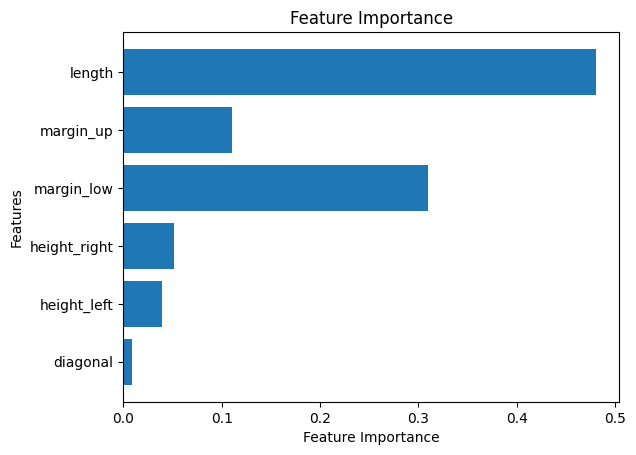

In [17]:
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a bar chart for feature importance
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


The feature importance plot shows which bill features matter most in predicting if a bill is genuine or fake. Based on the data, features like diagonal, height_left, and margin_low are the most important for the model’s predictions. These features play a key role in determining whether the bill is real or fake.